# Exploratory Data Analysis: MaxSold Item Enriched Details

Analysis of enriched item information including AI-generated descriptions, brands, categories, and attributes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path
from collections import Counter

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
sns.set_palette('husl')

## 1. Load Data

In [2]:
# Load the parquet file
data_path = '/workspaces/maxsold/data/item_enriched_details/item_enriched_details_20251201.parquet'
df = pd.read_parquet(data_path)

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset shape: (229124, 20)

Columns: ['item_id', 'amLotId', 'amAuctionId', 'title', 'description', 'qualitativeDescription', 'brand', 'seriesLine', 'condition', 'working', 'singleKeyItem', 'numItems', 'brands', 'brands_count', 'categories', 'categories_count', 'items', 'items_count', 'attributes', 'attributes_count']

Memory usage: 324.74 MB


In [3]:
# Display first few rows
df.head()

,item_id,amLotId,amAuctionId,title,description,qualitativeDescription,brand,seriesLine,condition,working,singleKeyItem,numItems,brands,brands_count,categories,categories_count,items,items_count,attributes,attributes_count
0,7488221,7488221,103849,Ceramic cookie jar and 4 cannisters,Ceramic cookie jar featuring cookie-topped lid...,Glazed ceramic in cream tones with multicolour...,unknown,,lightly used,False,False,6,None,0,"[""kitchenware"", ""ceramics""]",2,"[{""title"": ""ceramic cookie jar with teddy bear...",6,"[{""name"": ""material"", ""value"": ""ceramic""}]",1
1,7488178,7488178,103849,"AdTech glue gun, glue sticks, paper, binders, ...",AdTech HiTemp Project Pro hot glue gun with co...,"Mixed paper, plastic and metal office and craf...",AdTech,HiTemp Project Pro,unknown,False,False,20,None,0,"[""office supplies"", ""crafts"", ""tools""]",3,"[{""title"": ""AdTech HiTemp Project Pro glue gun...",13,None,0
2,7488137,7488137,103849,"Pressed glass bowl, cups and assorted kitchenware","Pressed glass handled serving bowl, seven matc...","Clear pressed glass with starburst pattern, wh...",,,lightly used,False,False,26,None,0,"[""kitchen"", ""glassware"", ""tableware"", ""servewa...",4,"[{""title"": ""Pressed glass handled serving bowl...",12,None,0
3,7490287,7490287,103882,4mm VVS1-D Moissanite Stud Earrings,Pair of 4 mm VVS1 D-color moissanite stud earr...,Square brilliant (princess) cut white moissani...,GRA,Moissanite Report,new,False,True,2,None,0,"[""jewellery""]",1,"[{""title"": ""Pair of 4 mm moissanite stud earri...",1,"[{""name"": ""gemstone"", ""value"": ""moissanite""}, ...",8
4,7488094,7488094,103849,Outdoor swing,Metal-frame patio swing with taupe fabric slin...,Brown powder-coated steel A-frame with angled ...,unknown,,lightly used,False,True,1,None,0,"[""outdoor furniture"", ""patio swing""]",2,"[{""title"": ""Three-seat metal-frame patio swing...",1,"[{""name"": ""overall_dimensions_in"", ""value"": ""7...",1


In [4]:
# Data types
df.dtypes

item_id                    object
amLotId                     int64
amAuctionId                 int64
title                      object
description                object
qualitativeDescription     object
brand                      object
seriesLine                 object
condition                  object
working                   boolean
singleKeyItem             boolean
numItems                    Int64
brands                     object
brands_count                Int64
categories                 object
categories_count            Int64
items                      object
items_count                 Int64
attributes                 object
attributes_count            Int64
dtype: object

## 2. Basic Statistics

In [29]:
# Summary statistics for numeric columns
# include 90th percentile
percentiles = [0.25, 0.5, 0.75, 0.9]
df.describe(percentiles=percentiles)
#df.describe()


,amLotId,amAuctionId,numItems,brands_count,categories_count,items_count,attributes_count,title_length,description_length
count,229124.00,229124.00,229124.00,229124.00,229124.00,229124.00,229124.00,229124.00,229124.00
mean,7204326.51,100663.42,6.49,0.29,2.18,2.84,2.98,45.64,174.60
std,184170.34,2330.68,52.81,0.87,0.70,3.06,1.83,14.94,76.09
min,3430422.00,36194.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,7060628.75,99358.00,1.00,0.00,2.00,1.00,2.00,36.00,124.00
50%,7208225.50,100825.00,2.00,0.00,2.00,1.00,3.00,43.00,160.00
75%,7348590.25,102183.00,5.00,0.00,2.00,4.00,4.00,53.00,206.00
90%,7432295.70,103025.00,12.00,1.00,3.00,7.00,5.00,65.00,265.00
max,7490322.00,103937.00,10000.00,31.00,14.00,67.00,23.00,194.00,1590.00


In [6]:
# Count statistics
print("=== Dataset Overview ===")
print(f"Total items: {len(df):,}")
print(f"Unique items: {df['item_id'].nunique():,}")
print(f"Unique auctions: {df['amAuctionId'].nunique():,}")
print(f"\nItems per auction (avg): {len(df) / df['amAuctionId'].nunique():.2f}")

=== Dataset Overview ===
Total items: 229,124
Unique items: 229,124
Unique auctions: 1,914

Items per auction (avg): 119.71


## 3. Missing Value Analysis

In [7]:
# Missing values
missing = df.isnull().sum()
missing_pct = 100 * missing / len(df)
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
}).sort_values('Missing Count', ascending=False)

missing_df[missing_df['Missing Count'] > 0]

,Missing Count,Percentage
brands,188310,82.19
attributes,23457,10.24
items,56,0.02
categories,43,0.02


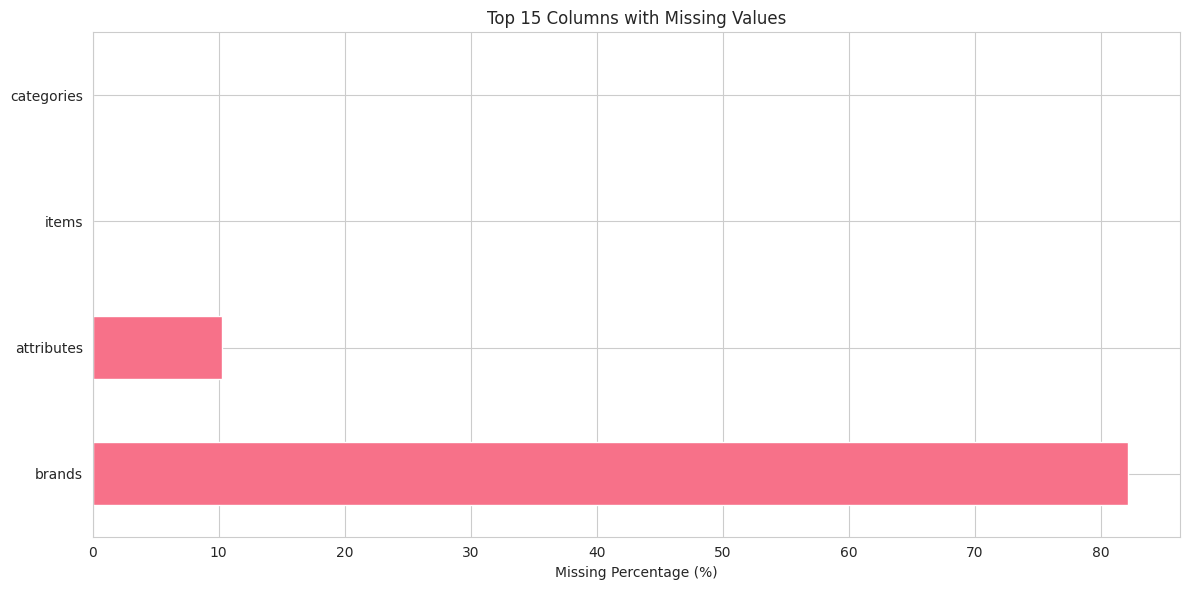

In [8]:
# Visualize missing values
fig, ax = plt.subplots(figsize=(12, 6))
missing_cols = missing_df[missing_df['Missing Count'] > 0].head(15)
missing_cols['Percentage'].plot(kind='barh', ax=ax)
ax.set_xlabel('Missing Percentage (%)')
ax.set_title('Top 15 Columns with Missing Values')
plt.tight_layout()
plt.show()

## 4. Text Field Analysis

In [9]:
# Title analysis
if 'title' in df.columns:
    print("=== Title Analysis ===")
    print(f"Items with title: {df['title'].notna().sum():,} ({100*df['title'].notna().sum()/len(df):.1f}%)")
    
    # Title length statistics
    df['title_length'] = df['title'].fillna('').astype(str).str.len()
    print(f"\nTitle length statistics:")
    print(df['title_length'].describe())
    
    # Sample titles
    print(f"\nSample titles:")
    print(df['title'].dropna().head(10).tolist())

=== Title Analysis ===
Items with title: 229,124 (100.0%)

Title length statistics:
count   229124.00
mean        45.64
std         14.94
min          0.00
25%         36.00
50%         43.00
75%         53.00
max        194.00
Name: title_length, dtype: float64

Sample titles:
['Ceramic cookie jar and 4 cannisters', 'AdTech glue gun, glue sticks, paper, binders, rulers, pens, stapler', 'Pressed glass bowl, cups and assorted kitchenware', '4mm VVS1-D Moissanite Stud Earrings', 'Outdoor swing', 'Electric skillet fryer, food processor, stand mixer', 'Zenith wooden cabinet with two doors', 'Oval cameo cabochon, 25×18.5 mm', 'Tiger, abstract, wolf wall art lot', 'Stainless Steel Breakfast Serveware Lot']


In [10]:
# Description analysis
if 'description' in df.columns:
    print("=== Description Analysis ===")
    print(f"Items with description: {df['description'].notna().sum():,} ({100*df['description'].notna().sum()/len(df):.1f}%)")
    
    # Description length statistics
    df['description_length'] = df['description'].fillna('').astype(str).str.len()
    print(f"\nDescription length statistics:")
    print(df['description_length'].describe())
    
    # Sample descriptions
    print(f"\nSample descriptions (first 200 chars):")
    for desc in df['description'].dropna().head(3):
        print(f"- {desc[:200]}...\n")

=== Description Analysis ===
Items with description: 229,124 (100.0%)

Description length statistics:
count   229124.00
mean       174.60
std         76.09
min          0.00
25%        124.00
50%        160.00
75%        206.00
max       1590.00
Name: description_length, dtype: float64

Sample descriptions (first 200 chars):
- Ceramic cookie jar featuring cookie-topped lid, teddy bear figures and COOKIES label; four ceramic countertop cannisters with raised fruit motifs and labels Frima, Nature House, Sugar, Coffee, each wi...

- AdTech HiTemp Project Pro hot glue gun with cord, three packs glue sticks, clear plastic container of multicolour thumb tacks, two clear geometric ruler sets, grey plastic paper trimmer with orange sl...

- Pressed glass handled serving bowl, seven matching punch cups, clear glass gravy boat, white ceramic oversized soup mug, six white porcelain dessert plates, metal fluted tart pan, white-handled pizza ...



In [11]:
# Qualitative description analysis
if 'qualitativeDescription' in df.columns:
    print("=== Qualitative Description Analysis ===")
    print(f"Items with qualitative description: {df['qualitativeDescription'].notna().sum():,}")
    print(f"\nTop qualitative descriptions:")
    print(df['qualitativeDescription'].value_counts().head(20))

=== Qualitative Description Analysis ===
Items with qualitative description: 229,124

Top qualitative descriptions:
qualitativeDescription
                                                                                                                                                                                                                                                                                                                                                                                                                                   91
Cookware features a blue-colored interior with a granite-like non-stick surface and silver exterior finish. Includes ergonomic handles in blue that match the interior color. The set includes different sized pots/pans and one transparent glass lid with a blue handle.                                                                                                                                                          1
Rectangular digit

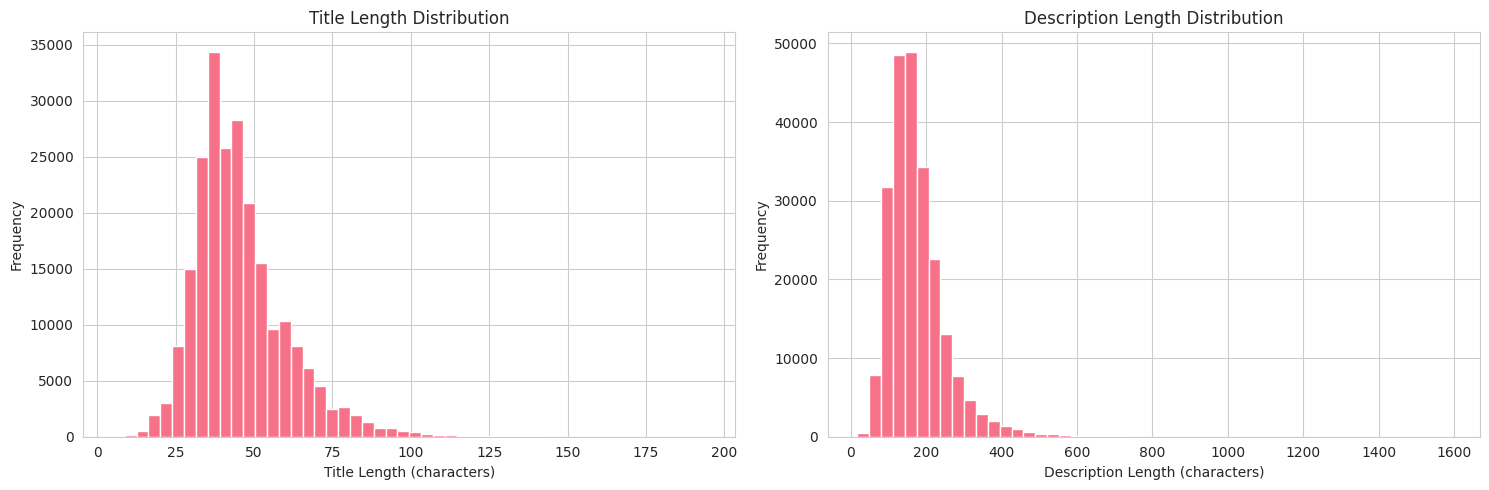

In [12]:
# Text length distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

if 'title_length' in df.columns:
    df[df['title_length'] > 0]['title_length'].hist(bins=50, ax=axes[0])
    axes[0].set_xlabel('Title Length (characters)')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Title Length Distribution')

if 'description_length' in df.columns:
    df[df['description_length'] > 0]['description_length'].hist(bins=50, ax=axes[1])
    axes[1].set_xlabel('Description Length (characters)')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title('Description Length Distribution')

plt.tight_layout()
plt.show()

## 5. Brand Analysis

In [13]:
# Single brand field
if 'brand' in df.columns:
    print("=== Brand Field Analysis ===")
    print(f"Items with brand: {df['brand'].notna().sum():,} ({100*df['brand'].notna().sum()/len(df):.1f}%)")
    print(f"\nTop 20 brands:")
    print(df['brand'].value_counts().head(20))

=== Brand Field Analysis ===
Items with brand: 229,124 (100.0%)

Top 20 brands:
brand
                       69821
unknown                16296
unbranded              14694
Unbranded               1892
Royal Canadian Mint     1572
Various                 1536
various                 1468
Royal Doulton           1280
Topps                   1279
Unknown                 1215
Marvel                   976
IKEA                     901
Upper Deck               781
O-Pee-Chee               727
Sony                     693
Disney                   687
Canada Post              648
Pyrex                    590
DC Comics                580
Royal Albert             541
Name: count, dtype: int64


In [14]:
# Brands array analysis
if 'brands' in df.columns:
    print("=== Brands Array Analysis ===")
    print(f"Items with brands array: {df['brands'].notna().sum():,}")
    
    # Parse brands JSON and count
    all_brands = []
    for brands_str in df['brands'].dropna():
        try:
            brands_list = json.loads(brands_str)
            all_brands.extend(brands_list)
        except:
            pass
    
    brand_counts = Counter(all_brands)
    print(f"\nTotal brand mentions: {len(all_brands):,}")
    print(f"Unique brands: {len(brand_counts):,}")
    print(f"\nTop 20 brands (from array):")
    for brand, count in brand_counts.most_common(20):
        print(f"  {brand}: {count:,}")

=== Brands Array Analysis ===
Items with brands array: 40,814

Total brand mentions: 66,070
Unique brands: 25,183

Top 20 brands (from array):
  unknown: 1,014
  Disney: 731
  : 562
  Marvel: 454
  Topps: 345
  Upper Deck: 304
  NHL: 296
  Sony: 272
  Hasbro: 270
  DC Comics: 267
  Columbia: 233
  unbranded: 225
  Nintendo: 211
  Score: 200
  Mattel: 198
  Royal Canadian Mint: 193
  Star Wars: 190
  Unknown: 186
  Pyrex: 175
  Royal Albert: 173


=== Brand Count Distribution ===
brands_count
0     188310
1      29091
2       5931
3       2536
4       1398
5        785
6        405
7        242
8        149
9         94
10        63
11        26
12        24
13        17
14        18
15         9
16         4
17         5
18         5
20         7
21         2
22         1
24         1
31         1
Name: count, dtype: Int64


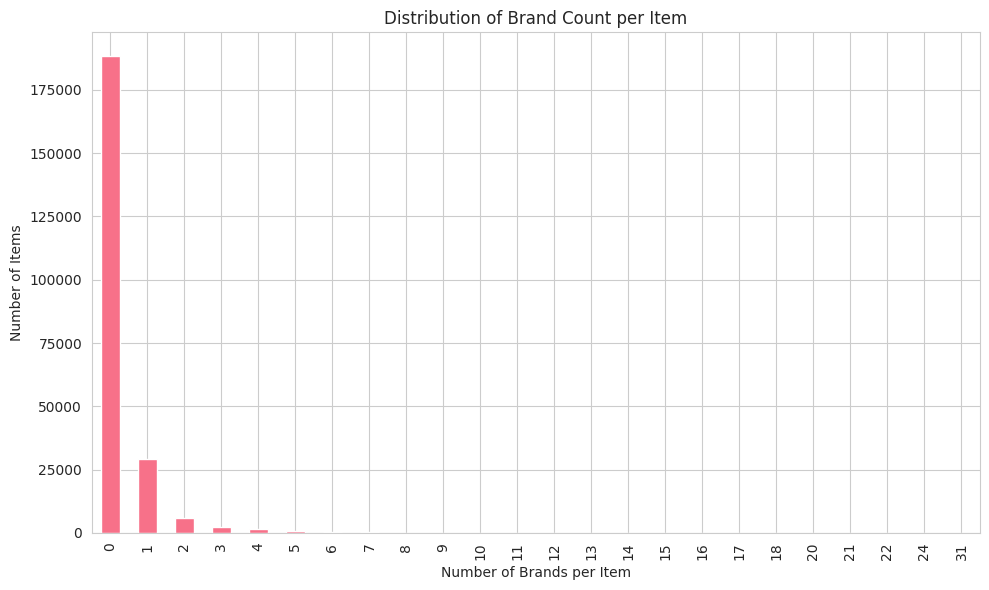

In [15]:
# Brand count distribution
if 'brands_count' in df.columns:
    print("=== Brand Count Distribution ===")
    print(df['brands_count'].value_counts().sort_index())
    
    fig, ax = plt.subplots(figsize=(10, 6))
    df['brands_count'].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_xlabel('Number of Brands per Item')
    ax.set_ylabel('Number of Items')
    ax.set_title('Distribution of Brand Count per Item')
    plt.tight_layout()
    plt.show()

## 6. Category Analysis

In [16]:
# Categories array analysis
if 'categories' in df.columns:
    print("=== Categories Analysis ===")
    print(f"Items with categories: {df['categories'].notna().sum():,} ({100*df['categories'].notna().sum()/len(df):.1f}%)")
    
    # Parse categories JSON and count
    all_categories = []
    for cats_str in df['categories'].dropna():
        try:
            cats_list = json.loads(cats_str)
            all_categories.extend(cats_list)
        except:
            pass
    
    category_counts = Counter(all_categories)
    print(f"\nTotal category mentions: {len(all_categories):,}")
    print(f"Unique categories: {len(category_counts):,}")
    print(f"\nTop 25 categories:")
    for category, count in category_counts.most_common(25):
        print(f"  {category}: {count:,}")

=== Categories Analysis ===
Items with categories: 229,081 (100.0%)

Total category mentions: 500,419
Unique categories: 23,304

Top 25 categories:
  collectibles: 25,073
  home decor: 18,364
  furniture: 14,799
  art: 11,227
  decor: 11,037
  kitchenware: 9,741
  jewellery: 8,345
  glassware: 8,067
  jewelry: 7,438
  books: 7,400
  lighting: 6,415
  electronics: 5,639
  toys: 5,416
  clothing: 5,336
  tools: 4,562
  storage: 4,304
  music: 4,303
  kitchen: 4,150
  ceramics: 3,982
  gemstones: 3,905
  serveware: 3,719
  figurines: 3,599
  drinkware: 3,475
  tableware: 3,357
  coins: 2,773


=== Category Count Distribution ===
categories_count
0         43
1      16295
2     168899
3      33928
4       6799
5       2166
6        659
7        206
8         72
9         26
10        13
11        10
12         6
13         1
14         1
Name: count, dtype: Int64


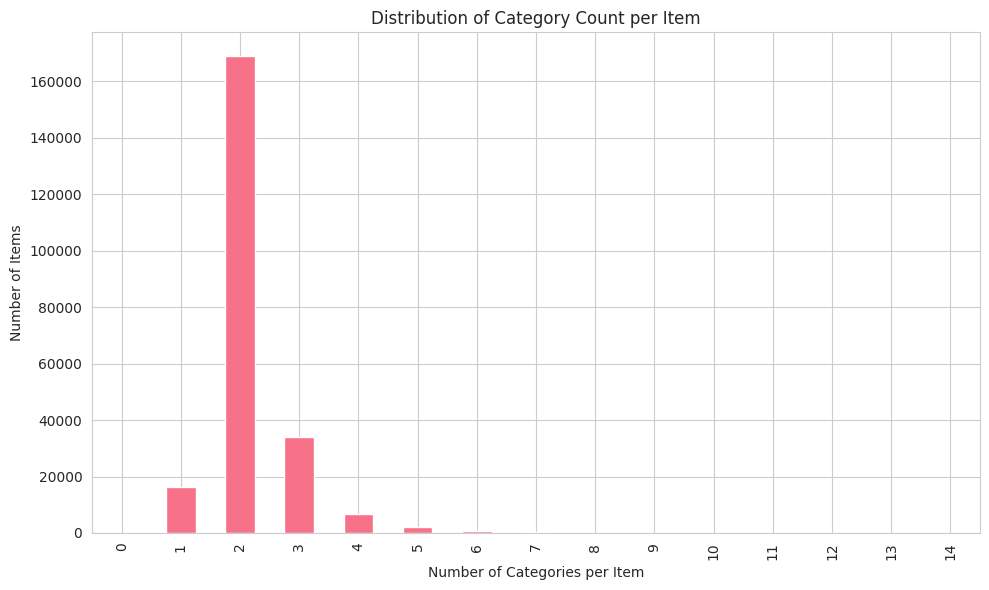

In [17]:
# Category count distribution
if 'categories_count' in df.columns:
    print("=== Category Count Distribution ===")
    print(df['categories_count'].value_counts().sort_index())
    
    fig, ax = plt.subplots(figsize=(10, 6))
    df['categories_count'].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_xlabel('Number of Categories per Item')
    ax.set_ylabel('Number of Items')
    ax.set_title('Distribution of Category Count per Item')
    plt.tight_layout()
    plt.show()

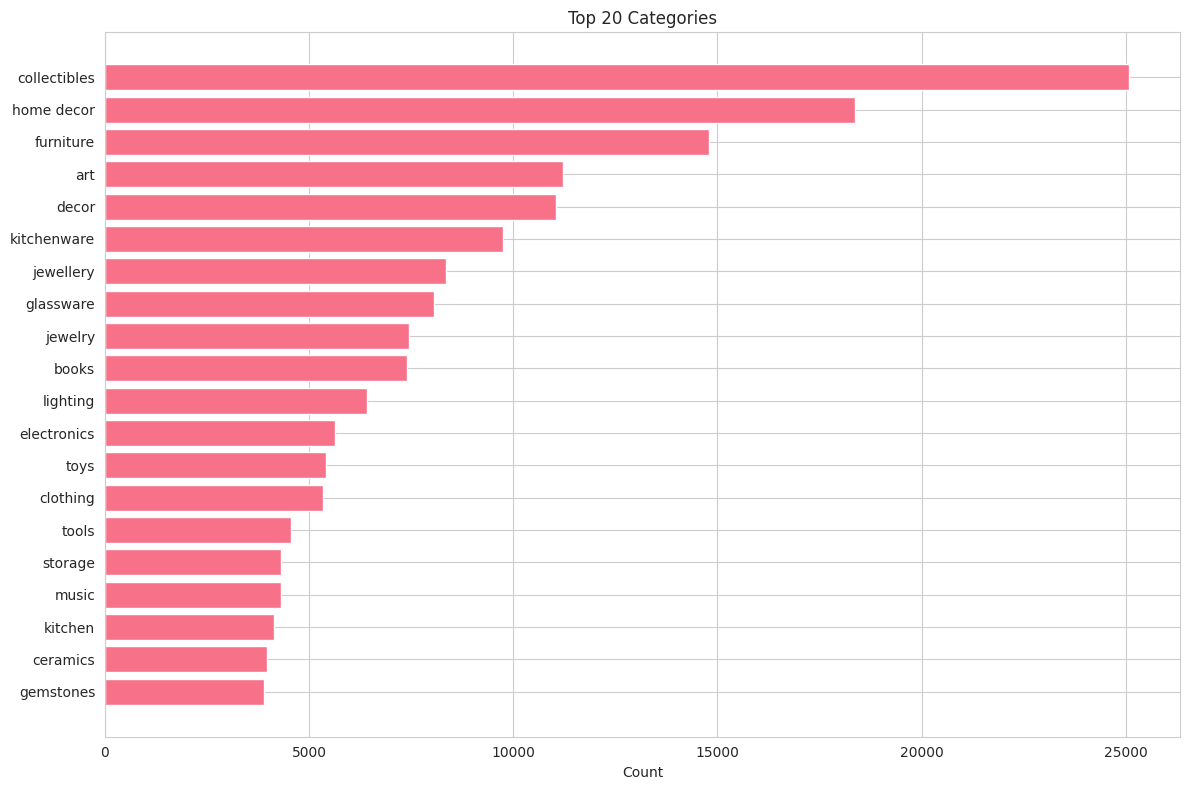

In [18]:
# Top categories visualization
if len(all_categories) > 0:
    fig, ax = plt.subplots(figsize=(12, 8))
    top_cats = category_counts.most_common(20)
    cats, counts = zip(*top_cats)
    y_pos = range(len(cats))
    ax.barh(y_pos, counts)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(cats)
    ax.invert_yaxis()
    ax.set_xlabel('Count')
    ax.set_title('Top 20 Categories')
    plt.tight_layout()
    plt.show()

## 7. Condition Analysis

=== Condition Analysis ===
Items with condition: 229,124 (100.0%)

Condition distribution:
condition
lightly used    153353
unknown          31360
new              23423
heavily used     20600
graded             388
Name: count, dtype: int64


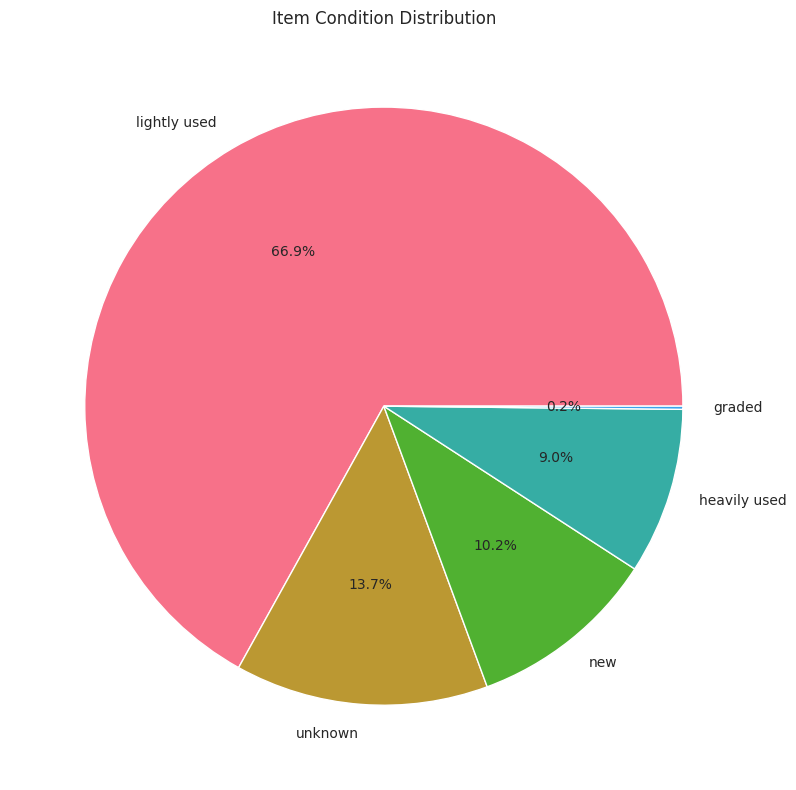

In [19]:
# Condition distribution
if 'condition' in df.columns:
    print("=== Condition Analysis ===")
    print(f"Items with condition: {df['condition'].notna().sum():,} ({100*df['condition'].notna().sum()/len(df):.1f}%)")
    print(f"\nCondition distribution:")
    print(df['condition'].value_counts())
    
    # Condition pie chart
    fig, ax = plt.subplots(figsize=(10, 8))
    df['condition'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax)
    ax.set_ylabel('')
    ax.set_title('Item Condition Distribution')
    plt.tight_layout()
    plt.show()

In [20]:
# Working status
if 'working' in df.columns:
    print("=== Working Status ===")
    print(df['working'].value_counts())
    print(f"\nPercentage working: {100*df['working'].sum()/df['working'].notna().sum():.1f}%")

=== Working Status ===
working
False    229124
Name: count, dtype: Int64

Percentage working: 0.0%


## 8. Items and Attributes Analysis

In [21]:
# Items count
if 'items_count' in df.columns:
    print("=== Items Count Analysis ===")
    print(df['items_count'].describe())
    print(f"\nDistribution:")
    print(df['items_count'].value_counts().sort_index().head(20))

=== Items Count Analysis ===
count   229124.00
mean         2.84
std          3.06
min          0.00
25%          1.00
50%          1.00
75%          4.00
max         67.00
Name: items_count, dtype: Float64

Distribution:
items_count
0         56
1     115420
2      35912
3      20209
4      14815
5      10312
6       8569
7       5673
8       4487
9       3473
10      3005
11      1648
12      1459
13       894
14       707
15       650
16       387
17       294
18       285
19       154
Name: count, dtype: Int64


In [22]:
# Attributes analysis
if 'attributes' in df.columns:
    print("=== Attributes Analysis ===")
    print(f"Items with attributes: {df['attributes'].notna().sum():,}")
    
    # Parse attributes and analyze
    all_attr_names = []
    for attrs_str in df['attributes'].dropna().head(1000):  # Sample to avoid memory issues
        try:
            attrs_list = json.loads(attrs_str)
            for attr in attrs_list:
                if isinstance(attr, dict) and 'name' in attr:
                    all_attr_names.append(attr['name'])
        except:
            pass
    
    if all_attr_names:
        attr_counts = Counter(all_attr_names)
        print(f"\nUnique attribute names: {len(attr_counts)}")
        print(f"\nTop 20 attribute names:")
        for attr, count in attr_counts.most_common(20):
            print(f"  {attr}: {count:,}")

=== Attributes Analysis ===
Items with attributes: 205,667

Unique attribute names: 1053

Top 20 attribute names:
  material: 381
  color: 173
  height_in: 99
  dimensions: 66
  width_in: 63
  size: 47
  shape: 45
  origin: 41
  style: 39
  height: 37
  cut: 35
  clarity: 35
  dimensions_mm: 34
  frame_material: 32
  medium: 29
  depth_in: 29
  treatment: 28
  carat_weight: 28
  finish: 27
  signed: 25


=== Attribute Count Distribution ===
count   229124.00
mean         2.98
std          1.83
min          0.00
25%          2.00
50%          3.00
75%          4.00
max         23.00
Name: attributes_count, dtype: Float64


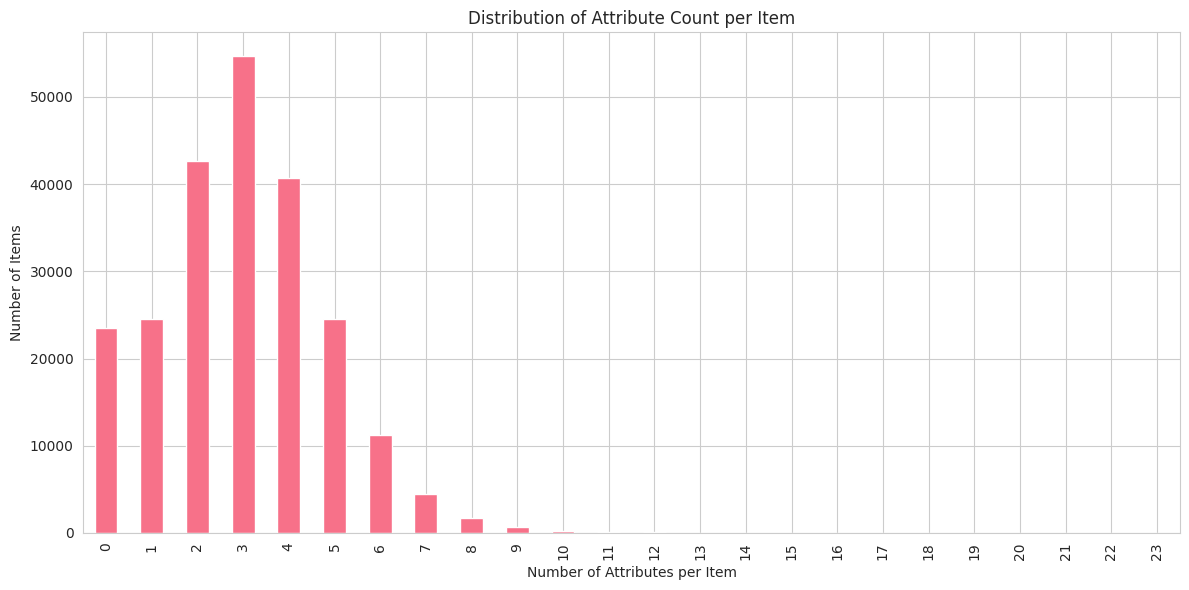

In [23]:
# Attributes count distribution
if 'attributes_count' in df.columns:
    print("=== Attribute Count Distribution ===")
    print(df['attributes_count'].describe())
    
    fig, ax = plt.subplots(figsize=(12, 6))
    df['attributes_count'].value_counts().sort_index().head(30).plot(kind='bar', ax=ax)
    ax.set_xlabel('Number of Attributes per Item')
    ax.set_ylabel('Number of Items')
    ax.set_title('Distribution of Attribute Count per Item')
    plt.tight_layout()
    plt.show()

## 9. NumItems Analysis

In [24]:
# Number of items per lot
if 'numItems' in df.columns:
    print("=== Number of Items per Lot ===")
    print(df['numItems'].describe())
    print(f"\nDistribution (top 20):")
    print(df['numItems'].value_counts().sort_index().head(20))
    
    # Single vs multiple items
    single_items = (df['numItems'] == 1).sum()
    multiple_items = (df['numItems'] > 1).sum()
    print(f"\nSingle item lots: {single_items:,} ({100*single_items/len(df):.1f}%)")
    print(f"Multiple item lots: {multiple_items:,} ({100*multiple_items/len(df):.1f}%)")

=== Number of Items per Lot ===
count   229124.00
mean         6.49
std         52.81
min          0.00
25%          1.00
50%          2.00
75%          5.00
max      10000.00
Name: numItems, dtype: Float64

Distribution (top 20):
numItems
0         75
1     109542
2      31862
3      16662
4      12250
5       7982
6       7671
7       5175
8       4623
9       3613
10      3732
11      2096
12      2711
13      1606
14      1477
15      1978
16       881
17       829
18      1035
19       493
Name: count, dtype: Int64

Single item lots: 109,542 (47.8%)
Multiple item lots: 119,507 (52.2%)


In [25]:
# Single key item
if 'singleKeyItem' in df.columns:
    print("=== Single Key Item Analysis ===")
    print(df['singleKeyItem'].value_counts())
    print(f"\nPercentage single key items: {100*df['singleKeyItem'].sum()/df['singleKeyItem'].notna().sum():.1f}%")

=== Single Key Item Analysis ===
singleKeyItem
True     120998
False    108126
Name: count, dtype: Int64

Percentage single key items: 52.8%


## 10. Series Line Analysis

In [26]:
# Series line
if 'seriesLine' in df.columns:
    print("=== Series Line Analysis ===")
    print(f"Items with series line: {df['seriesLine'].notna().sum():,} ({100*df['seriesLine'].notna().sum()/len(df):.1f}%)")
    print(f"\nTop 20 series lines:")
    print(df['seriesLine'].value_counts().head(20))

=== Series Line Analysis ===
Items with series line: 229,124 (100.0%)

Top 20 series lines:
seriesLine
                         145899
Star Wars                   198
Trading Card Game           178
unknown                     178
Jasperware                   97
limited edition print        95
Beanie Babies                87
Bunnykins                    84
Mid-Century Modern           83
Group of Seven               83
Evesham                      81
Limited Edition              80
The Mighty Thor              76
N/A                          67
Classic                      67
Vintage                      66
Wii                          65
Art Deco                     62
Magic: The Gathering         61
Cornflower                   61
Name: count, dtype: int64


## 11. Data Completeness Analysis

=== Data Completeness ===
             Completeness %
title                100.00
description          100.00
brand                100.00
condition            100.00
categories            99.98
attributes            89.76


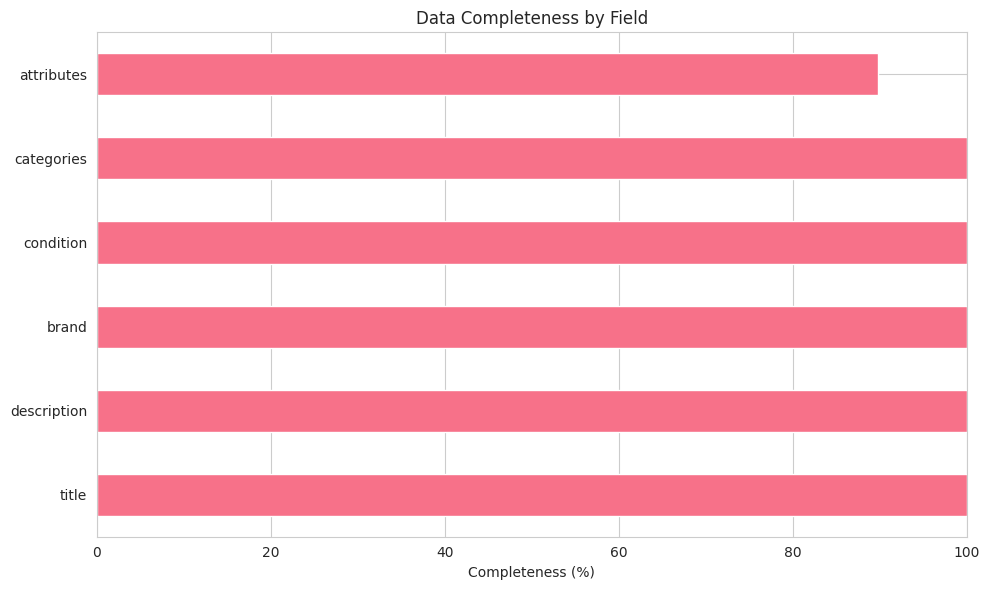

In [27]:
# Data completeness by field
completeness = {}
key_fields = ['title', 'description', 'brand', 'condition', 'categories', 'attributes']

for field in key_fields:
    if field in df.columns:
        completeness[field] = 100 * df[field].notna().sum() / len(df)

completeness_df = pd.DataFrame.from_dict(completeness, orient='index', columns=['Completeness %'])
completeness_df = completeness_df.sort_values('Completeness %', ascending=False)
print("=== Data Completeness ===")
print(completeness_df)

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
completeness_df.plot(kind='barh', ax=ax, legend=False)
ax.set_xlabel('Completeness (%)')
ax.set_title('Data Completeness by Field')
ax.set_xlim(0, 100)
plt.tight_layout()
plt.show()

## 12. Summary Statistics

In [28]:
print("=" * 70)
print("ENRICHED ITEM DETAILS - SUMMARY")
print("=" * 70)
print(f"\nTotal Records: {len(df):,}")
print(f"Unique Items: {df['item_id'].nunique():,}")
print(f"Unique Auctions: {df['amAuctionId'].nunique():,}")
print(f"\nData Completeness:")
for field in ['title', 'description', 'brand', 'categories', 'attributes']:
    if field in df.columns:
        pct = 100 * df[field].notna().sum() / len(df)
        print(f"  {field}: {pct:.1f}%")
print("\nArray Field Statistics:")
for field in ['brands_count', 'categories_count', 'items_count', 'attributes_count']:
    if field in df.columns:
        print(f"  {field}: mean={df[field].mean():.2f}, max={df[field].max()}")
print("=" * 70)

ENRICHED ITEM DETAILS - SUMMARY

Total Records: 229,124
Unique Items: 229,124
Unique Auctions: 1,914

Data Completeness:
  title: 100.0%
  description: 100.0%
  brand: 100.0%
  categories: 100.0%
  attributes: 89.8%

Array Field Statistics:
  brands_count: mean=0.29, max=31
  categories_count: mean=2.18, max=14
  items_count: mean=2.84, max=67
  attributes_count: mean=2.98, max=23
